# Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv("Boston.csv")
housing.head(3)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
housing["CHAS"].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIME        506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           503 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  House_Price  506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing.describe()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,503.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285998,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701765,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.622000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


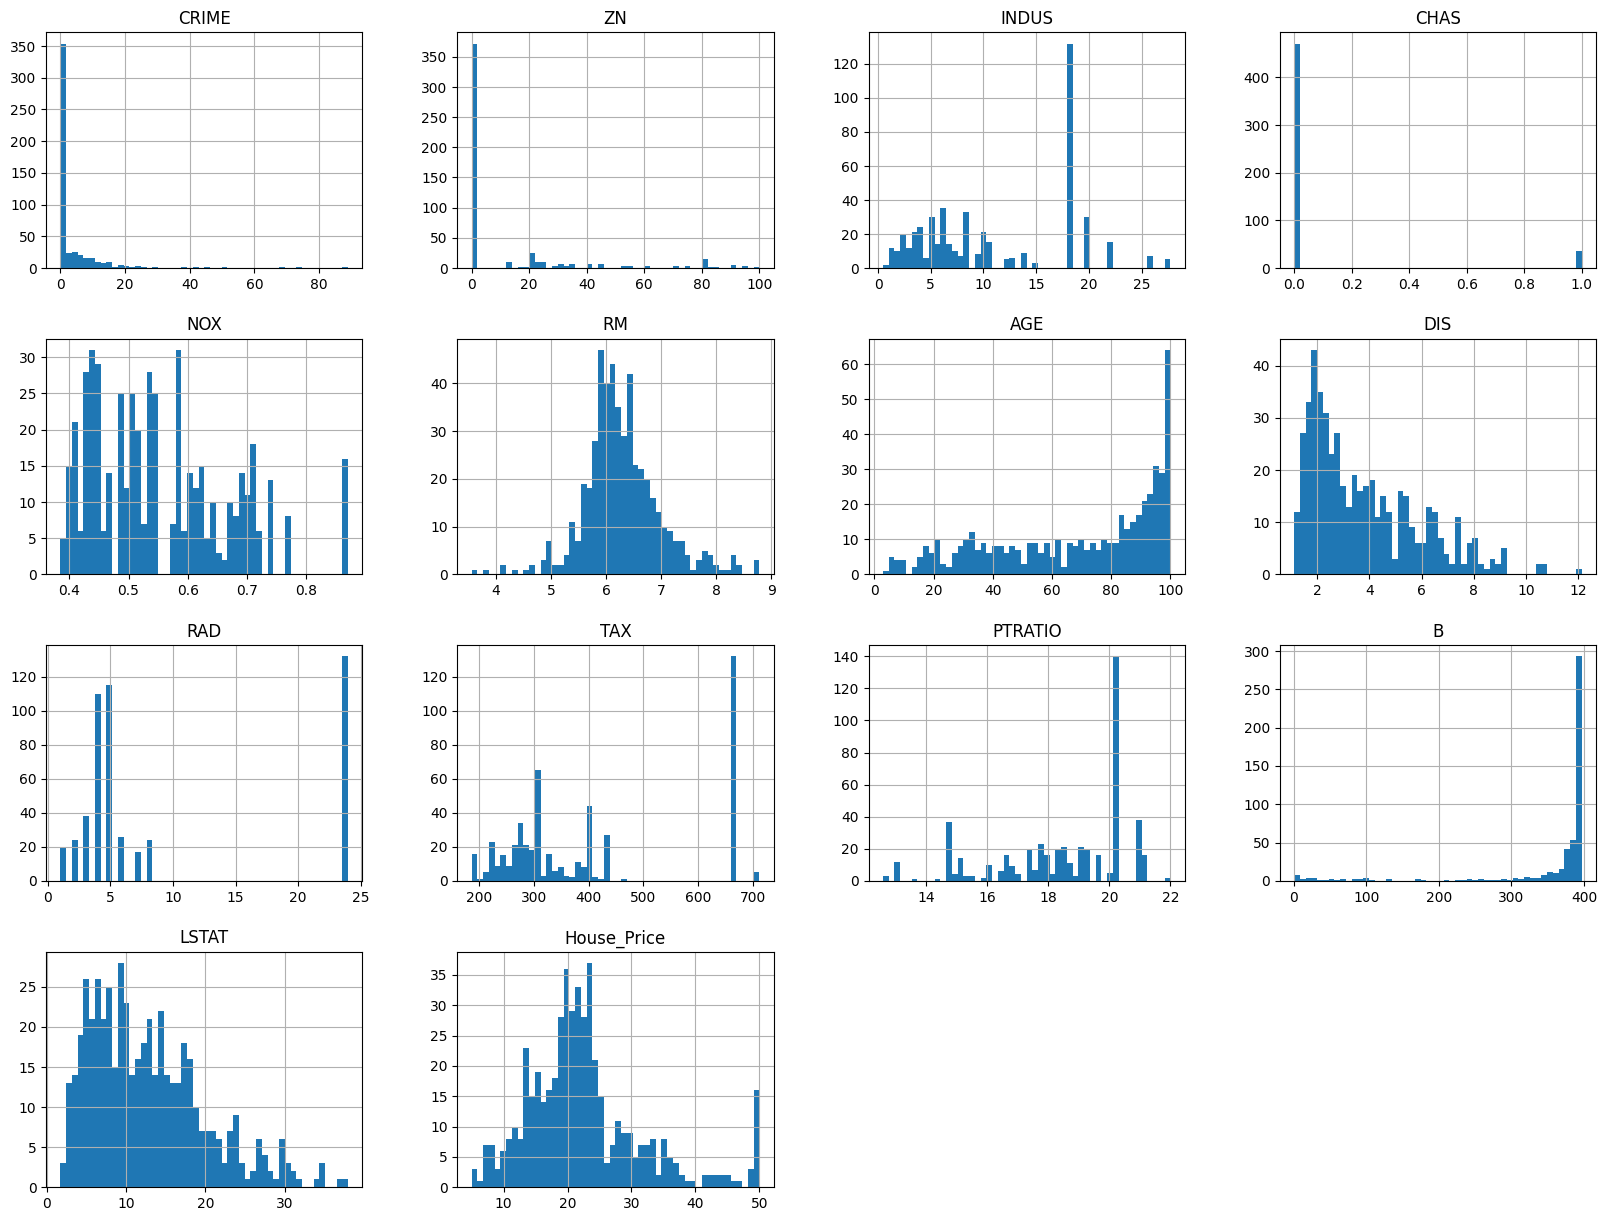

In [6]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Train-Test Splitting

In [7]:
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
# train_set, test_set = split_train_test(housing, 0.2)

In [9]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [10]:
x = housing.iloc[:,:-1]
y = housing["House_Price"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# x_train, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
# print(f"Rows in train set: {len(x_train)}\nRows in test set: {len(x_test)}")

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
housing = strat_train_set.copy()

# Looking for correlation

In [17]:
corr_matrix = housing.corr()
corr_matrix['House_Price'].sort_values(ascending=False)

House_Price    1.000000
RM             0.678335
B              0.361761
ZN             0.339741
DIS            0.240451
CHAS           0.205066
AGE           -0.364596
RAD           -0.374693
CRIME         -0.393715
NOX           -0.422873
TAX           -0.456657
INDUS         -0.473516
PTRATIO       -0.493534
LSTAT         -0.740494
Name: House_Price, dtype: float64

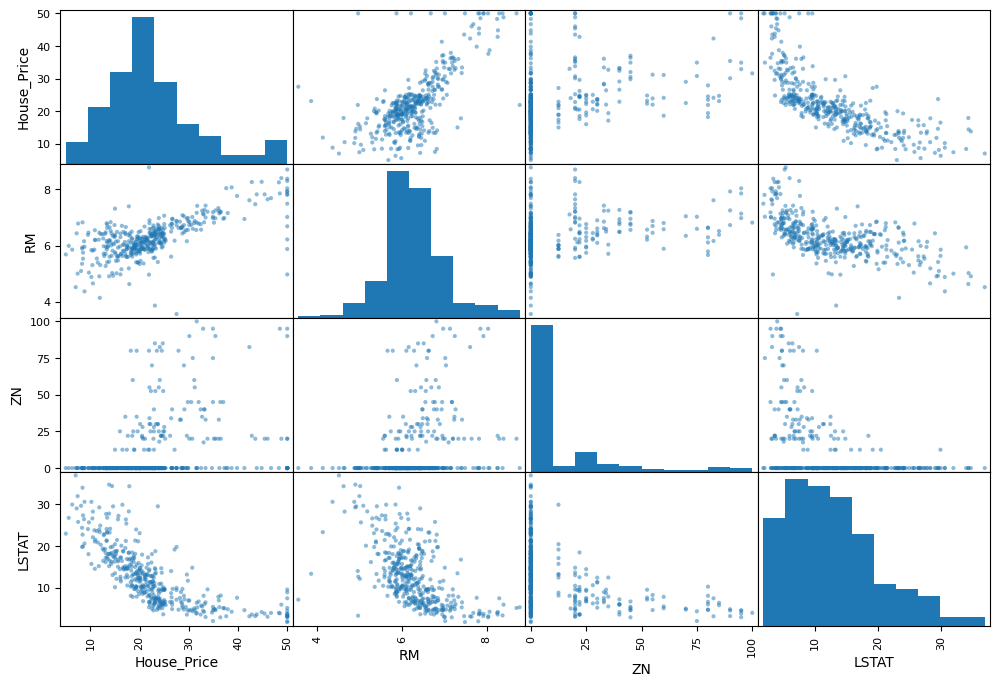

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["House_Price", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

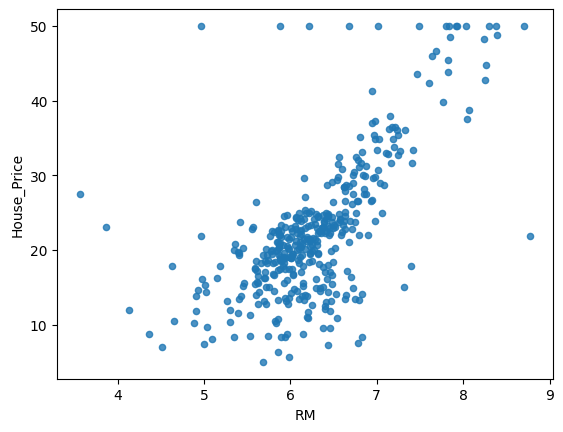

In [19]:
housing.plot(kind="scatter", x="RM", y="House_Price", alpha=0.8)
plt.show()

# Trying Out Attributes Combination

In [20]:
housing["TAXRM"] = housing["TAX"]/ housing["RM"]

In [21]:
housing.head()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing.corr()
corr_matrix['House_Price'].sort_values(ascending=False)

House_Price    1.000000
RM             0.678335
B              0.361761
ZN             0.339741
DIS            0.240451
CHAS           0.205066
AGE           -0.364596
RAD           -0.374693
CRIME         -0.393715
NOX           -0.422873
TAX           -0.456657
INDUS         -0.473516
PTRATIO       -0.493534
TAXRM         -0.523617
LSTAT         -0.740494
Name: House_Price, dtype: float64

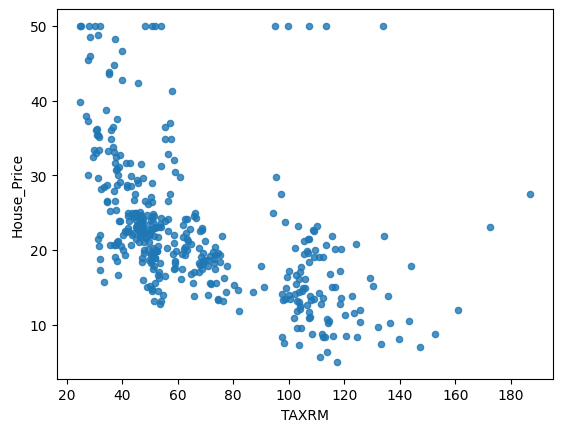

In [23]:
housing.plot(kind="scatter", x="TAXRM", y="House_Price", alpha=0.8)
plt.show()

# Missing Attributes

In [24]:
# To take care of missing attributes, you have three options:
# 1. Get rid of missing data points
# 2. Get rid of the whole attributes
# 3. Set the value to some value(0, mean or median)

In [25]:
# a = housing.dropna(subset=["RM"]) #option 1
# a.shape

In [26]:
# housing.drop("RM", axis=1).shape #option 2
# #Note that there is no RM column

In [27]:
median = housing["RM"].median() #compute median for option 3

In [28]:
housing["RM"].fillna(median) #option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [29]:
housing.shape

(404, 15)

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [31]:
imputer.statistics_.shape

(15,)

In [32]:
X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [34]:
housing_tr.describe()

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279082,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.490762
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710691,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.426854
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.961287
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


# Scikit-Learn Design

primarily, three types of objects
1. Estimators - It estimates some parameter based on dataset. Eg. imputer
   It has a fit method and transform method.
   Fit method - Fits the dataset and calculates internal parameters
3. Transformers - 
4. Predictors - 